# import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2

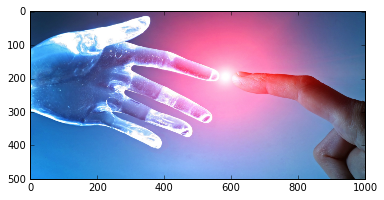

In [2]:
img = cv2.imread('chatbots blog.jpg')
im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (1000, 500))
plt.figure(0)
plt.imshow(im, cmap='gray')
plt.show()

# Pandas

In [3]:
ds = pd.read_csv("movie_metadata.csv")
ds.head()
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [4]:
val = ds.values
print type(val), val.shape

<type 'numpy.ndarray'> (5043, 28)


In [5]:
ds.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [6]:
titles = ds.get(['movie_title'])
print titles.head()

                                         movie_title
0                                            Avatar 
1          Pirates of the Caribbean: At World's End 
2                                           Spectre 
3                             The Dark Knight Rises 
4  Star Wars: Episode VII - The Force Awakens    ...


In [7]:
lens = []

for ix in titles.values:
    lens.append(len(str(ix[0])))
    
print len(lens)

5043


In [10]:
freq = {}

for ix in lens:
    curr = freq.get(ix, 0)
    #.get will set ix to 0 if it is not present in ix
    freq[ix] = curr + 1

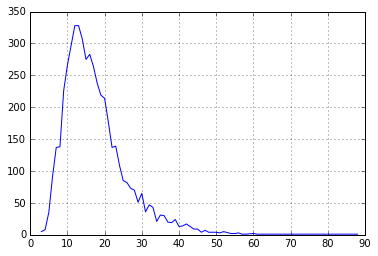

In [11]:
plt.figure(0)
plt.grid("on")
plt.plot(freq.keys(), freq.values())
plt.show()

# Lecture-3 Practice

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2

In [3]:
def distance(v1, v2):
    return np.sqrt(((v1-v2)**2).sum())

In [22]:
def knn(train, test, k=3):
    dist=[]
    
    for i in range(train.shape[0]):
        ix = train[i, :-1]
        iy = train[i, -1]
        d = distance(ix, test)
        dist.append([d, iy])
        #Now sort this dist and take only top k dist
        dk = sorted(dist, key=lambda x:x[0])[:k]
        #now count the no of labels
        labels = np.array(dk)[:,-1]
        output = np.unique(labels)
        return output

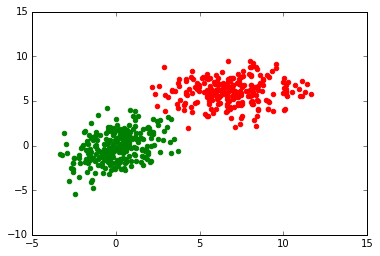

In [23]:
mean_01 = np.array([0.0, 0.0])
mean_02 = np.array([7., 6.])

cov_01 = np.array([[2.0, 1.0],
                   [1.0, 3.0]])
cov_02 = np.array([[4.0, 0.0],
                   [0.0, 2.0]])
data_01 = np.random.multivariate_normal(mean_01,
                                       cov_01, 250)
data_02 = np.random.multivariate_normal(mean_02,
                                       cov_02, 250)


plt.figure(0)
plt.scatter(data_01[:, 0], data_01[:, 1], color='green')
plt.scatter(data_02[:, 0], data_02[:, 1], color='red')
plt.show()

In [24]:
data_X = np.concatenate((data_01, data_02), axis=0)
print data_X.shape
data_y = np.zeros((500, 1))
data_y[250:] = 1

data = np.concatenate((data_X, data_y), axis=1)
print data.shape

(500, 2)
(500, 3)


In [50]:
def distance(v1, v2):
    return np.sqrt(((v1-v2)**2).sum())

def knn(train, test, k=3):
    dist = []
    for i in range(train.shape[0]):
        ix = train[i, :-1]
        iy = train[i, -1]
        d = distance(ix, test)
        dist.append([d, iy])
        
    dk = sorted(dist, key = lambda x : x[0])[:k]
    labels = np.array(dk)[:,-1]
    output = np.unique(labels, return_counts=True)
    index = np.argmax(output[1])
    return output[0][index]
    
    

In [52]:
x = np.array([5.0, 4.0])

print knn(data, x, k=5)

1.0


In [53]:
from sklearn.datasets import load_digits

In [56]:
data = load_digits(return_X_y=True)

In [57]:
X = data[0]
Y = data[1]

In [61]:
ds = np.concatenate((X, Y.reshape(-1, 1)), axis=1)
ds.shape

(1797, 65)

In [63]:
trainset = ds[:1500]
testset = ds[1500:]
trainset.shape, testset.shape

((1500, 65), (297, 65))

In [70]:
def test_on_set(trainset, testing, k=3):
    preds = []
    targets = []
    for ix in range(testing.shape[0]):
        out = knn(trainset, testing[ix, :-1], k=k)
        preds.append(out)
        targets.append(testing[ix, -1])
    preds = np.array(preds)
    targets = np.array(targets)
    acc = float((preds==targets).sum())/len(preds)
    
    print "Accuracy: {} wiht k: {}".format(acc, k)
    return acc

In [71]:
accs = []
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

for kx in ks:
    acx = test_on_set(trainset, testset, k=kx)
    accs.append(acx)

Accuracy: 0.956228956229 wiht k: 2
Accuracy: 0.959595959596 wiht k: 3
Accuracy: 0.959595959596 wiht k: 4
Accuracy: 0.956228956229 wiht k: 5
Accuracy: 0.946127946128 wiht k: 6
Accuracy: 0.946127946128 wiht k: 7
Accuracy: 0.942760942761 wiht k: 8
Accuracy: 0.942760942761 wiht k: 9
Accuracy: 0.942760942761 wiht k: 10
Accuracy: 0.942760942761 wiht k: 11
Accuracy: 0.942760942761 wiht k: 12
Accuracy: 0.939393939394 wiht k: 13
Accuracy: 0.942760942761 wiht k: 14
Accuracy: 0.939393939394 wiht k: 15
Accuracy: 0.946127946128 wiht k: 16
Accuracy: 0.942760942761 wiht k: 17
Accuracy: 0.939393939394 wiht k: 18


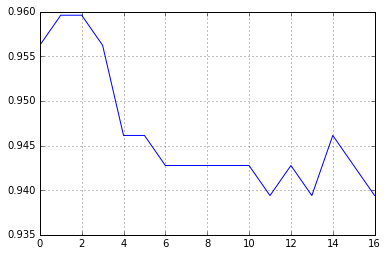

In [73]:
plt.figure(0)
plt.grid('on')
plt.plot(accs)
plt.show()

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2

In [3]:
from sklearn.datasets import load_diabetes

In [13]:
data = load_diabetes(return_X_y=True)
X = data[0]
Y = data[1]
X.shape, Y.shape

((442, 10), (442,))